# Project Title
Real-time Anomaly Detection in Financial Transactions

#Authors and Team
Author 1: Haozhen Guo

Author 2: Yang Liu

Team name: Black Thym

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.cluster import DBSCAN
!pip install catboost
from catboost import CatBoostClassifier, Pool
import warnings
warnings.filterwarnings('ignore')

import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/527 Practium/Second Report')

Mounted at /content/gdrive


# Raw Data Preview

The original data consists of two datasets, 'train_transaction.csv' and 'train_identity.csv'. Both datasets record features related to transactions with the same 'TransactionID'. Therefore, we started with the raw data and aimed to find the proper way to join these two datasets, considering more relevant features.

In [ ]:
df_transaction= pd.read_csv('train_transaction.csv')
df_identity = pd.read_csv('train_identity.csv')

In [ ]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


As shown above, the "train_trasaction.csv" dataset contains much more features than "train_identity.csv". Moreover, both datasets contains about 590000 records of transactions, which is enough to generate some machine learning methods. Since that, we would try both left join and inner join to combine these two datasets.

## Left Join vs Inner Join

In [ ]:
df_left = pd.merge(df_transaction, df_identity, on='TransactionID', how = 'left')
print(df_left.shape)
df_left.head()

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
df_inner = pd.merge(df_transaction, df_identity, on='TransactionID', how = 'inner')
print(df_inner.shape)
df_inner.head()

(144233, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
#df_left.to_csv('train_all_left.csv')
#df_inner.to_csv('train_all_inner.csv')

In [ ]:
df_left=pd.read_csv('train_all_left.csv').iloc[:,1:]
df_inner=pd.read_csv('train_all_inner.csv').iloc[:,1:]

In [ ]:
df_left['isFraud'].value_counts(dropna=False, normalize = True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

In [ ]:
df_inner['isFraud'].value_counts(dropna=False, normalize = True)

0    0.92153
1    0.07847
Name: isFraud, dtype: float64

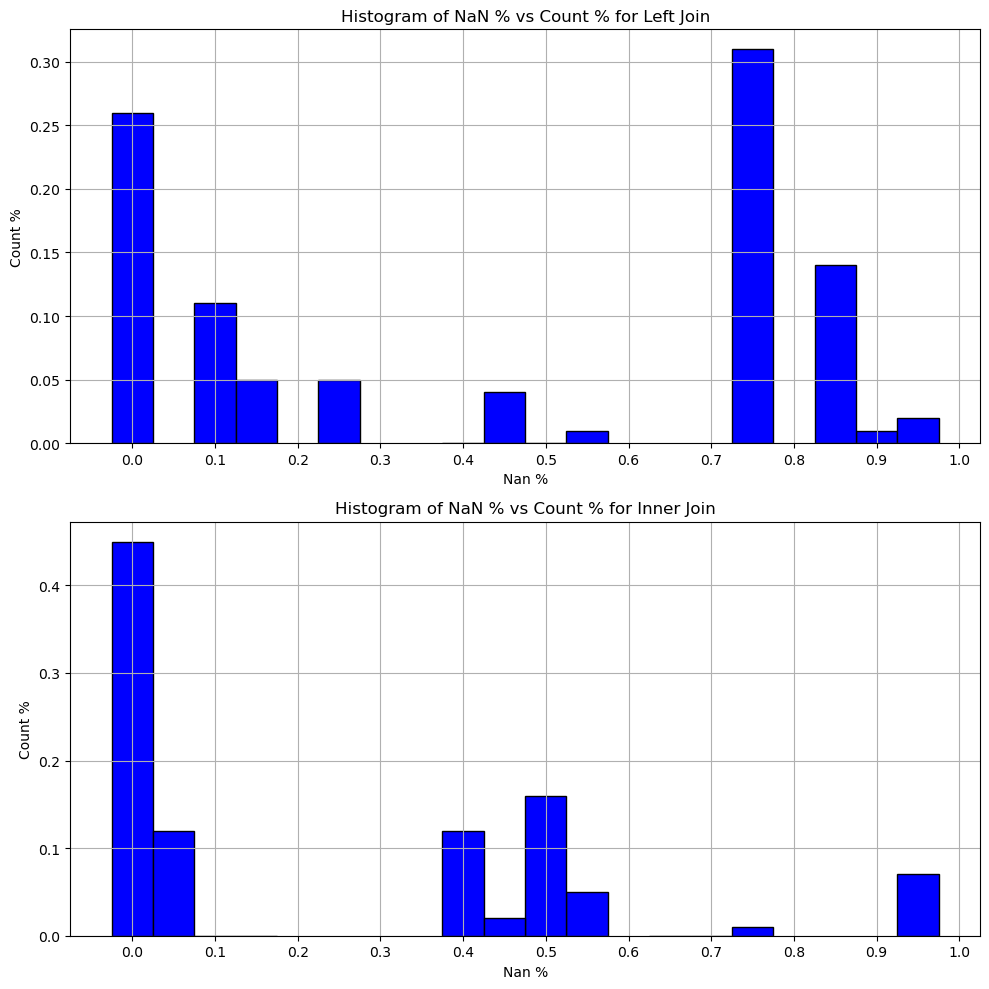

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for i in range(2):
    if i == 0:
        df_draw = df_left
    elif i == 1:
        df_draw = df_inner

    l_df_null = {}
    for val in df_draw.isnull().mean():
        l_df_null[round(val//0.05 * 0.05,2)] = l_df_null.get(round(val//0.05 * 0.05,2),0) + 1

    l_keys, l_values = [],[]
    for k,v in l_df_null.items():
        l_keys.append(k)
        l_values.append(round(v/434,2))

    axs[i].bar(l_keys, l_values, width=0.05, color='b', edgecolor='black')
    axs[i].set_xlabel('Nan %')
    axs[i].set_ylabel('Count %')
    axs[i].set_title('Histogram of NaN % vs Count % for '+['Left Join','Inner Join'][i])
    axs[i].grid(True)
    axs[i].set_xticks([i/10 for i in range(11)])

plt.tight_layout()
plt.show()

## Inner Join Dataset Summary

In [ ]:
def create_summary_table(df):
    summary = pd.DataFrame(index = df.columns)
    summary['Data Type'] = df.dtypes.values
    summary['# Nonnull records'] = df.count().values
    summary['# Non-zero records'] = df.astype(bool).sum(axis=0)
    summary['% null records'] = round(df.isna().sum()/df.shape[0]*100,2)
    summary['% non-zero records'] = round(df.astype(bool).sum(axis=0) / df.shape[0]*100,2)
    summary['Unique values'] = df.nunique().values
    #summary.to_csv('summary_table.csv')
    return summary

In [ ]:
summary = create_summary_table(df_inner)
summary

,Data Type,# Nonnull records,# Non-zero records,% null records,% non-zero records,Unique values
TransactionID,int64,144233,144233,0.00,100.00,144233
isFraud,int64,144233,11318,0.00,7.85,2
TransactionDT,int64,144233,144233,0.00,100.00,142734
TransactionAmt,float64,144233,144233,0.00,100.00,7830
ProductCD,object,144233,144233,0.00,100.00,4
...,...,...,...,...,...,...
id_36,object,140985,144233,2.25,100.00,2
id_37,object,140985,144233,2.25,100.00,2
id_38,object,140985,144233,2.25,100.00,2
DeviceType,object,140810,144233,2.37,100.00,2


In [ ]:
#summary.to_csv('summary_table.csv')

# Data Preprocessing

## Data Cleaning

### Correlation Check for Target Column
Before dropping columns with a high percentage of NaN or dominated values, we first calculate the correlation between each column and the **target column (“isFraud”)**. This helps us identify features that may strongly correlate with the target when a transaction is fraudulent. After performing the calculations, the highest absolute correlation value is **0.396**, indicating that no feature has a strong correlation with the target column.

In [ ]:
numerical_col = df_inner.columns[df_inner.dtypes != 'object']

In [ ]:
corr_map = {}
for col in list(numerical_col)[3:]:
    temp_df = df_inner[['isFraud',col]].dropna(how='any')
    if temp_df.shape[0] > 1:
        if temp_df[col].nunique() > 1:
            corr = temp_df['isFraud'].corr(temp_df[col])
            corr_map[col] = corr

top_5_abs_values = sorted(corr_map.items(), key=lambda item: abs(item[1]), reverse=True)[:5]
print("Top 5 absolute correlation values and their keys:")
for key, value in top_5_abs_values:
    print(f"Key: {key}, Value: {value}")

Top 5 absolute correlation values and their keys:
Key: V87, Value: 0.39601617889413643
Key: V45, Value: 0.3931208942704132
Key: V86, Value: 0.3878639694956673
Key: V257, Value: 0.38328561488204954
Key: V246, Value: 0.36713876151766056


### Drop NA and Dominant-value Feature
We use two methods to analyze the distribution of NaN values in our dataset. First, we create a table that records each feature's data type, percentage of null values, and the number of unique values, which helps us evaluate the characteristics of each feature. Next, we calculate the proportion of NaN values to determine an appropriate threshold for handling missing data. The following table shows the proportion of NaN values:

In [ ]:
l_df_null = {}
for i in df_inner.isnull().mean():
    Nan_Percentage = i//0.05 * 0.05
    l_df_null[str(round(Nan_Percentage,2))+"-"+ str(round(Nan_Percentage+0.05,2))] = l_df_null.get(str(round(Nan_Percentage,2))+"-"+ str(round(Nan_Percentage+0.05,2)),0) + 1

pd.DataFrame(list(l_df_null.items()), columns=['Nan %', 'Count']).sort_values(by='Nan %')

,Nan %,Count
0,0.0-0.05,194
4,0.05-0.1,50
9,0.1-0.15,2
11,0.15-0.2,1
1,0.4-0.45,50
8,0.45-0.5,8
7,0.5-0.55,70
6,0.55-0.6,23
10,0.65-0.7,1
3,0.7-0.75,2


 From the table, it is evident that when the NaN percentage is in the range **[0, 0.15]**, we retain half of the features, which is sufficient for model training. Additionally, there are no features with NaN percentages between 0.15 and 0.40. A 15% threshold for NaN values is significantly more manageable compared to 40%, making it a preferable choice for data retention.

If a feature contains a high percentage of identical values, it contributes little useful information and may introduce noise into the model. Therefore, we decided to drop features with a high proportion of dominated values to reduce noise and maintain the quality of the dataset.


In [ ]:
def threshold(t_null, t_dominant, df):
    many_null_col = list(set([col for col in df.columns if df[col].isnull().mean() > t_null]))

    dominant_value_col =list(set([col for col in df.columns if df[col].value_counts(dropna=False, normalize=True).values[0] > t_dominant]))
    cols_to_drop = list(set(many_null_col+dominant_value_col))
    return cols_to_drop

In [ ]:
cols_to_drop=threshold(0.2, 0.8, df_inner)
cols_to_drop.remove('isFraud')
df_drop = df_inner.drop(columns=cols_to_drop)

print(df_drop.shape)
df_drop.head()

(144233, 83)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_19,id_20,id_28,id_29,id_31,id_35,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,542.0,144.0,New,NotFound,samsung browser 6.2,T,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,621.0,500.0,New,NotFound,mobile safari 11.0,T,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,410.0,142.0,Found,Found,chrome 62.0,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,176.0,507.0,New,NotFound,chrome 62.0,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,529.0,575.0,Found,Found,chrome 62.0,T,T,T,desktop,MacOS


In [ ]:
#df_drop.to_csv('df_drop.csv')

In [ ]:
#df_drop = pd.read_csv('df_drop.csv').iloc[:,1:]

In [ ]:
df_drop['isFraud'].value_counts(dropna=False, normalize = True)

0    0.92153
1    0.07847
Name: isFraud, dtype: float64

In [ ]:
full_data_col = df_drop.loc[:, df_drop.isnull().sum() == 0].columns.values
categorical_col = df_drop.columns[df_drop.dtypes == 'object']
numerical_col = df_drop.columns[df_drop.dtypes != 'object']

categorical_col_NAN = [col for col in categorical_col if col not in full_data_col]
numerical_col_NAN = [col for col in numerical_col if col not in full_data_col]
numerical_col_FULL = [col for col in numerical_col if col in full_data_col]

### Fill NAN

#### Correlation heatmap of Features with entire values

Since our approach to filling missing values relies on model training using features with available data, we first use a heat map to visualize the correlations among these features. This helps us identify relationships between them and allows us to reduce the dimensionality of the dataset before imputing the missing values.


In [ ]:
print(numerical_col_FULL)

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'id_01']


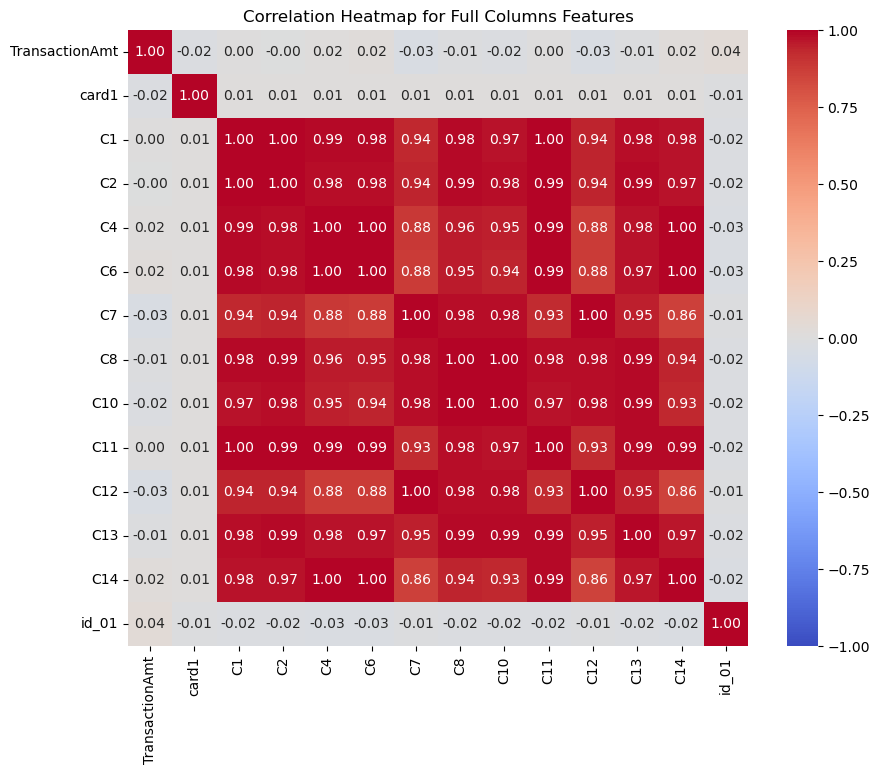

In [ ]:
corr_matrix = df_drop[numerical_col_FULL[3:]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Full Columns Features')
plt.show()

In [ ]:
PCA_list = ['C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14']
C_X = df_drop.loc[:,PCA_list]
scaler = StandardScaler()
pca = PCA(n_components=1)
pca.fit(scaler.fit_transform(C_X))
C_PCA = pca.transform(C_X)

C:\Anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


According to the heatmap, features from C1 to C14 are highly correlated. When multiple features are highly correlated, they may contain redundant information. By using PCA, we create one component which captures the core information from all the original features.


In [ ]:
df_drop = df_drop.copy().drop(columns = PCA_list)
df_drop['C_PCA'] = C_PCA

In [ ]:
full_data_col = df_drop.loc[:, df_drop.isnull().sum() == 0].columns.values
categorical_col = df_drop.columns[df_drop.dtypes == 'object']
numerical_col = df_drop.columns[df_drop.dtypes != 'object']

categorical_col_NAN = [col for col in categorical_col if col not in full_data_col]
numerical_col_NAN = [col for col in numerical_col if col not in full_data_col]
numerical_col_FULL = [col for col in numerical_col if col in full_data_col]

#### Categorical Feature Visualization
Before filling the NaN value of categorical features, the visualization of categorical features is necessary for us to decide use which way to fill them.

In [ ]:
print(categorical_col_NAN)

['card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_35', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


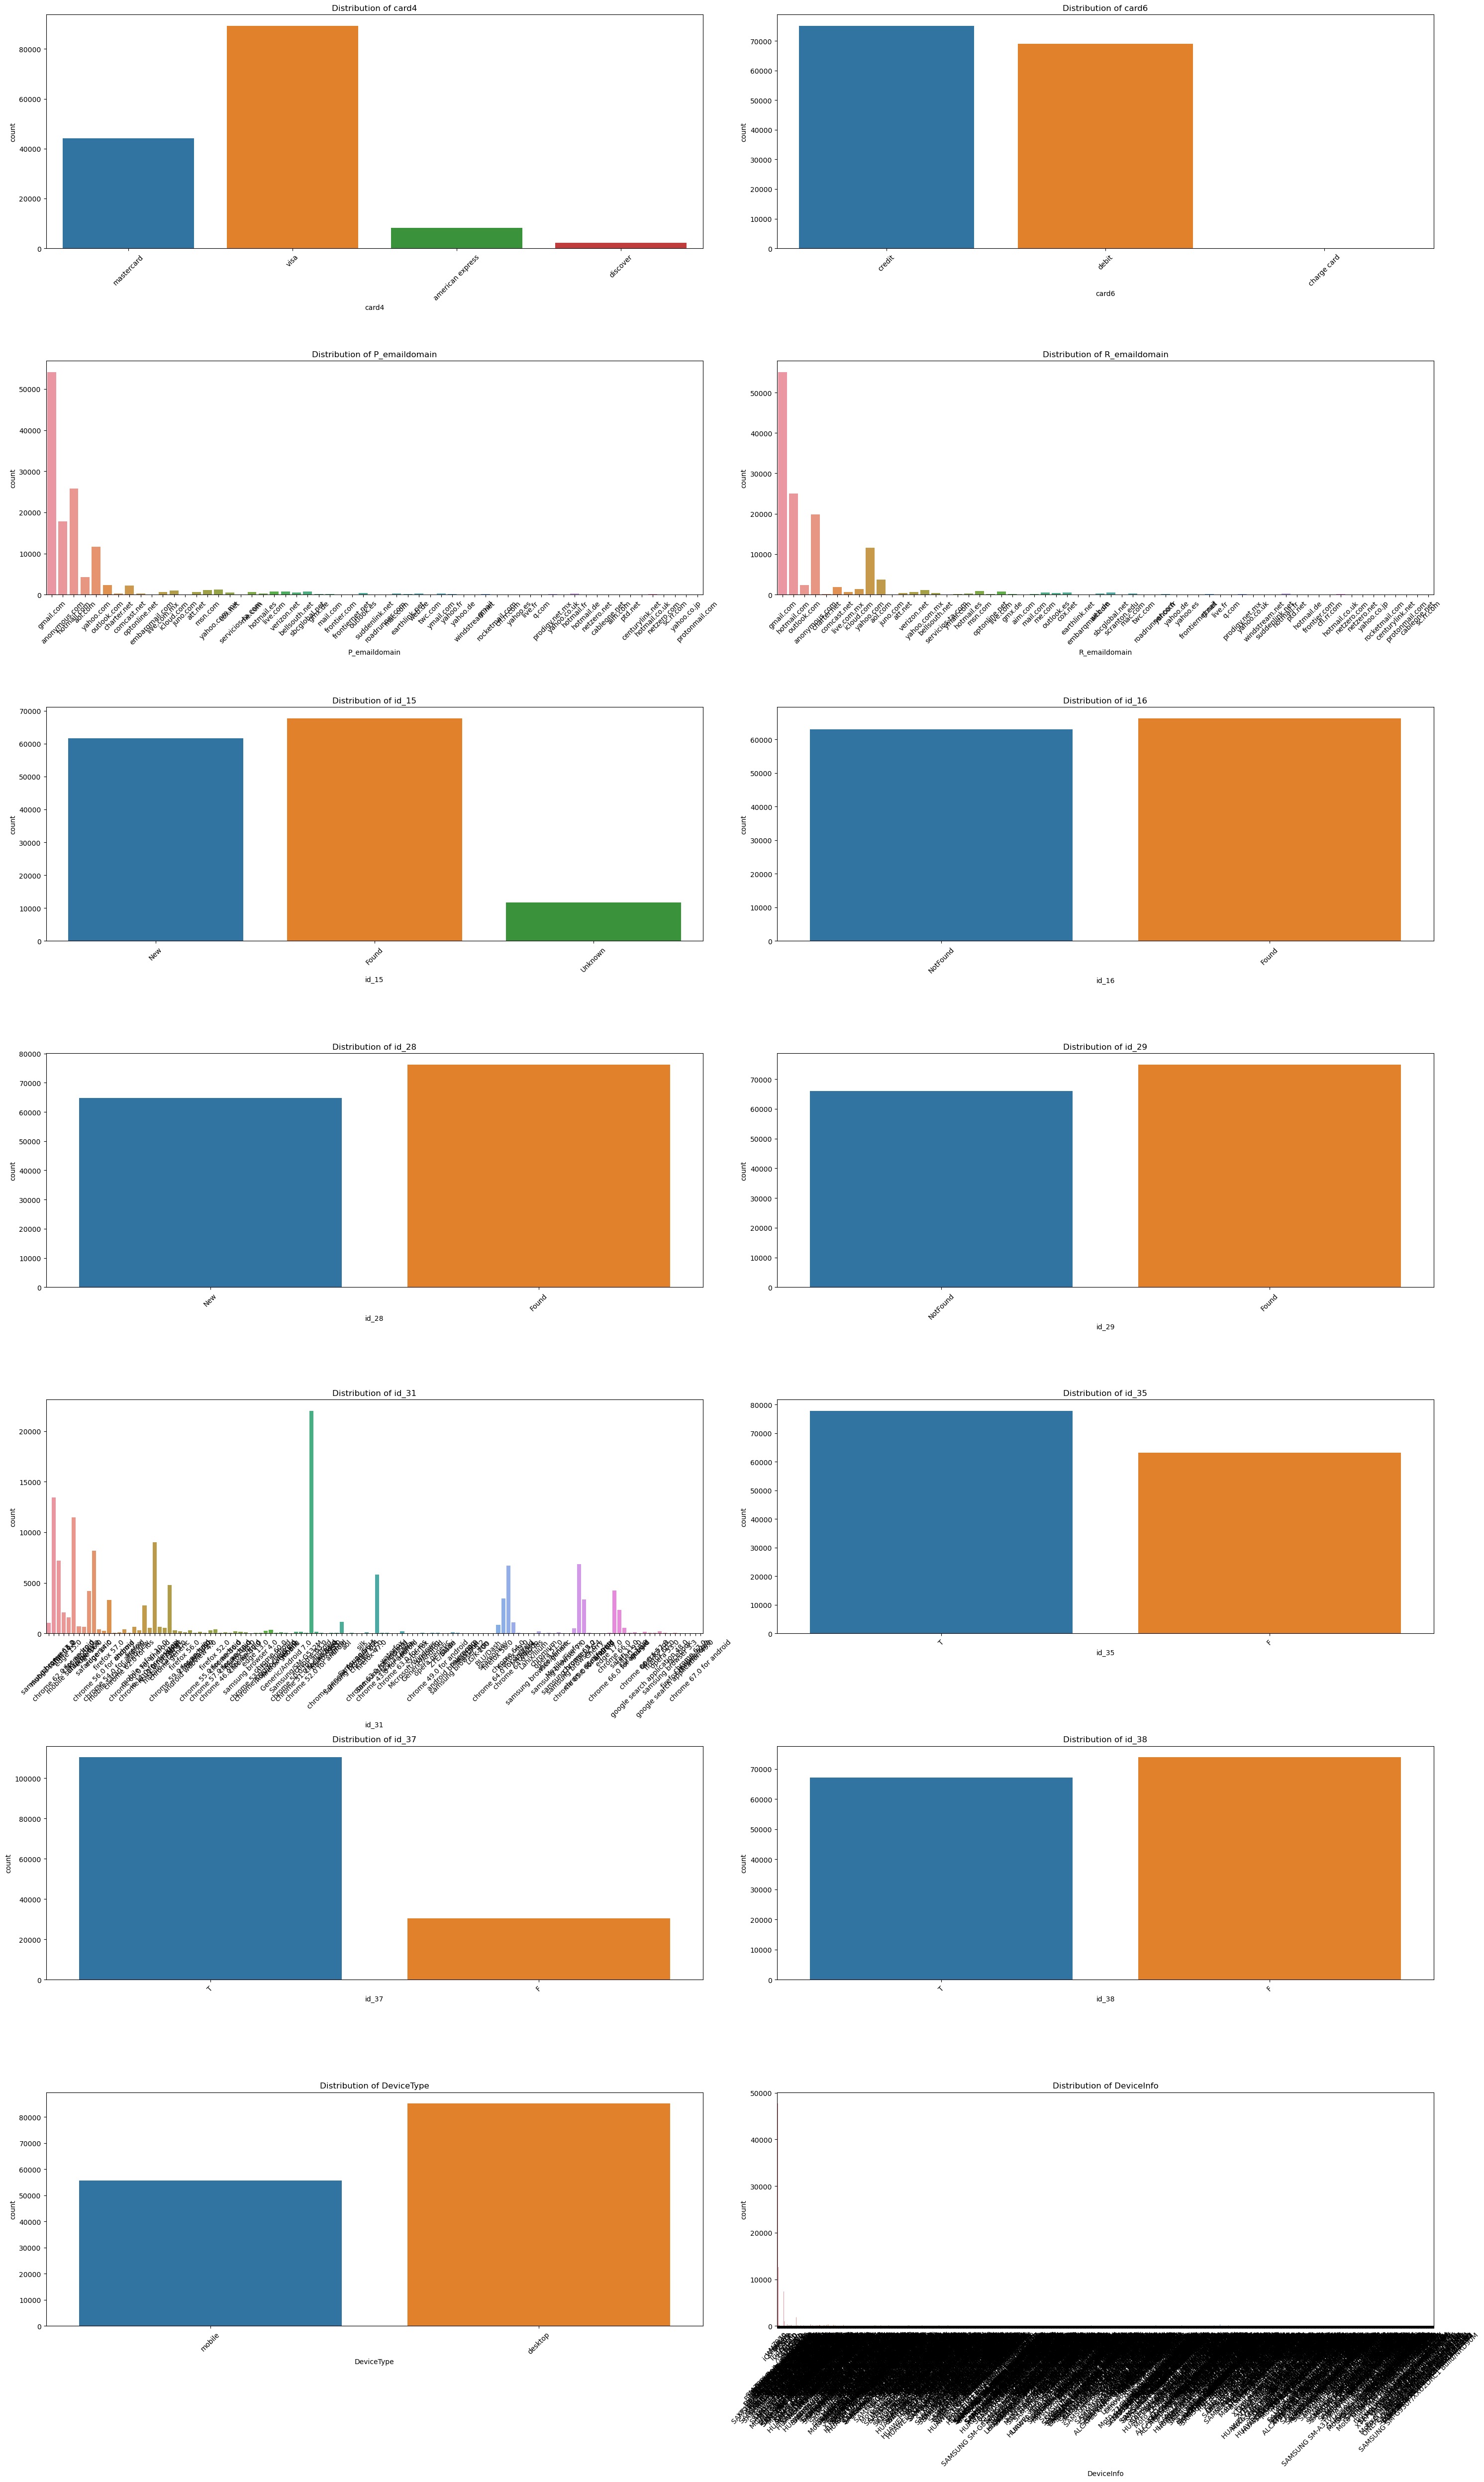

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(30, 50))
axes = axes.flatten()

# Plot the distribution of each categorical feature
for i, col in enumerate(categorical_col_NAN):
    sns.countplot(data=df_drop, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

We used bar charts to visualize the distributions of various features, revealing four types of patterns.


*   The first type is characterized by clear classification with a small number of unique values (less than 5), such as card4 and card6.
*   The second type displays a highly uneven distribution, where a few categories dominate most of the data, and the frequency of other categories drops sharply, exhibiting a typical long-tail effect; P_emaildomain is an example of this pattern.
*   The third type is a sparse distribution, where there are many unique values, but each value appears infrequently, resulting in a very low frequency for most categories such as DeviceInfo. It contributes limited information to the model.
*   Additionally, we observed a combination of the second and third distribution types in certain features, such as id_31, which represents browser type and version. While a few values account for a significant portion of the data, the remaining values are distributed sparsely. Subtle differences in browser versions are not critical to the model's predictive power, and an overly granular division could introduce noise into the model.

So we need to drop the feature “DeviceInfo”, extract key information as new eigenvalues for the id_31.


#### Drop Feature (DeviceInfo)

In [ ]:
df_NAFill_Cat=df_NAFill_Cat.drop(['DeviceInfo'], axis=1)
categorical_col_NAN.remove('DeviceInfo')

In [ ]:
create_summary_table(df_NAFill_Cat).loc[categorical_col_NAN]

,Data Type,# Nonnull records,# Non-zero records,% null records,% non-zero records,Unique values
card4,object,144233,144233,0.0,100.0,4
card6,object,144233,144233,0.0,100.0,3
P_emaildomain,object,144233,144233,0.0,100.0,8
R_emaildomain,object,144233,144233,0.0,100.0,9
id_15,object,144233,144233,0.0,100.0,3
id_16,object,144233,144233,0.0,100.0,2
id_28,object,144233,144233,0.0,100.0,2
id_29,object,144233,144233,0.0,100.0,2
id_31,object,144233,144233,0.0,100.0,6
id_35,object,144233,144233,0.0,100.0,2


#### Simple Filling
In the feature ‘id_15’, it already has a value ‘Unknown’, so we just use the ‘Unknown’ to simply fill the NaN value.

In [ ]:
df_NAFill_Cat = df_drop.copy()
print(list(df_NAFill_Cat['id_15'].unique()))
df_NAFill_Cat['id_15'] = df_NAFill_Cat['id_15'].fillna('Unknown')

['New', 'Found', nan, 'Unknown']


#### KNN filling

##### Preprocessing (categorical) -> KNN filling
The feature id_31 captures the type of browser used, but it includes various versions of each browser. Including version information would create an excessive number of categories, resulting in sparse and fragmented data. To address this, we chose to disregard the version details and focus only on the browser type. This approach retains the essential information about the browser while reducing the number of categories, making the data more concentrated and easier to analyze. Upon examination, we identified the primary browser types in this feature, including 'chrome,' 'safari,' 'firefox,' 'edge,' and others.


In [ ]:
unique_browser_info = df_NAFill_Cat['id_31'].unique()
unique_browser_info

array(['samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0', nan,
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [ ]:
browser_type = [
    'chrome','safari','firefox','edge','other', 'samsung','opera','silk','waterfox',
    'Nokia','puffin','Microsoft','cyberfox','ZTE','palemoon','maxthon','line','LG',
    'konqueror','iceweasel','iron','BLU','seamonkey','M4','comodo','Lanix','Inco',
    'Cherry','icedragon','BLU','android']

In [ ]:
transfer_map = {}
for browser in unique_browser_info:
    browser_lower = str(browser).lower()
    for keyword in browser_type:
        keyword_lower = keyword.lower()
        if keyword_lower in browser_lower:
            transfer_map[browser] = keyword
            break
        elif 'google' in browser_lower or 'chromium' in browser_lower:
            transfer_map[browser] = 'chrome'
        elif 'ie' in browser_lower:
            transfer_map[browser] = 'edge'
        else:
            transfer_map[browser] = browser
df_NAFill_Cat['id_31'] = df_NAFill_Cat['id_31'].map(transfer_map)
df_drop['id_31'] = df_drop['id_31'].map(transfer_map)

##### Grouping Infrequent Values
For the processed features id_31, P_emaildomain, and R_emaildomain, we first calculated the proportion of unique values within each feature. The results indicated that most values had relatively low frequencies, each comprising less than 1% of the total. Therefore, we grouped these infrequent values into a single category labeled "others." This approach simplifies the feature categories, reduces noise, and enhances the model's generalization ability.

In [ ]:
browser_type_counts = df_drop['id_31'].value_counts(normalize=True)*100
browser_counts = {}
for i in browser_type_counts.values:
    browser_counts[i//1] = browser_counts.get(i//1,0) + 1
l_keys, l_values = [],[]
for k,v in browser_counts.items():
    l_keys.append(k)
    l_values.append(v)
pd.DataFrame({'browser_type %':l_keys, 'Count':l_values}).sort_values(by='browser_type %',ascending=False)

,browser_type %,Count
0,54.0,1
1,26.0,1
2,11.0,1
3,5.0,1
4,1.0,1
5,0.0,26


In [ ]:
threshold = 1
browser_type_others = browser_type_counts[browser_type_counts < threshold].index.tolist()
df_NAFill_Cat['id_31'] = df_drop['id_31'].apply(lambda x: 'others' if x in browser_type_others else x)

df_NAFill_Cat['id_31'].value_counts(normalize=True)*100

chrome     54.485451
safari     26.414898
edge       11.631873
firefox     4.922591
samsung     1.566216
others      0.978972
Name: id_31, dtype: float64

In [ ]:
df_NAFill_Cat['P_emaildomain'].unique()

array(['gmail.com', 'anonymous.com', 'hotmail.com', 'aol.com',
       'yahoo.com', nan, 'outlook.com', 'charter.net', 'comcast.net',
       'optonline.net', 'embarqmail.com', 'live.com.mx', 'icloud.com',
       'juno.com', 'att.net', 'msn.com', 'yahoo.com.mx', 'cox.net',
       'servicios-ta.com', 'me.com', 'hotmail.es', 'live.com',
       'verizon.net', 'bellsouth.net', 'sbcglobal.net', 'gmx.de',
       'mail.com', 'frontier.com', 'frontiernet.net', 'outlook.es',
       'suddenlink.net', 'roadrunner.com', 'mac.com', 'earthlink.net',
       'web.de', 'twc.com', 'ymail.com', 'yahoo.fr', 'yahoo.de',
       'windstream.net', 'gmail', 'rocketmail.com', 'cfl.rr.com',
       'yahoo.es', 'live.fr', 'q.com', 'prodigy.net.mx', 'yahoo.co.uk',
       'hotmail.fr', 'hotmail.de', 'netzero.net', 'cableone.net',
       'aim.com', 'ptd.net', 'centurylink.net', 'hotmail.co.uk',
       'netzero.com', 'sc.rr.com', 'yahoo.co.jp', 'protonmail.com'],
      dtype=object)

In [ ]:
p_emaildomain_counts = df_NAFill_Cat['P_emaildomain'].value_counts(normalize=True)*100
email_counts = {}
for i in p_emaildomain_counts.values:
    email_counts[i//1] = email_counts.get(i//1,0) + 1
l_keys, l_values = [],[]
for k,v in email_counts.items():
    l_keys.append(k)
    l_values.append(v)
pd.DataFrame({'email %':l_keys, 'Count':l_values}).sort_values(by='email %',ascending=False)

,email %,Count
0,41.0,1
1,19.0,1
2,13.0,1
3,8.0,1
4,3.0,1
5,1.0,2
6,0.0,52


In [ ]:
threshold = 1
p_emaildomain_others = p_emaildomain_counts[p_emaildomain_counts < threshold].index.tolist()
df_NAFill_Cat['P_emaildomain'] = df_drop['P_emaildomain'].apply(lambda x: 'others' if x in p_emaildomain_others else x)

In [ ]:
df_NAFill_Cat['R_emaildomain'].unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'comcast.net', 'live.com.mx', 'icloud.com',
       'yahoo.com', 'aol.com', 'juno.com', 'att.net', 'verizon.net',
       'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com', 'ymail.com',
       'hotmail.es', 'msn.com', 'optonline.net', 'live.com', 'gmx.de',
       'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'prodigy.net.mx', 'yahoo.co.uk', 'windstream.net',
       'suddenlink.net', 'hotmail.fr', 'ptd.net', 'hotmail.de',
       'frontier.com', 'cfl.rr.com', 'hotmail.co.uk', 'netzero.com',
       'netzero.net', 'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [ ]:
r_emaildomain_counts = df_NAFill_Cat['R_emaildomain'].value_counts(normalize=True)*100
email_counts = {}
for i in r_emaildomain_counts.values:
    email_counts[i//1] = email_counts.get(i//1,0) + 1
l_keys, l_values = [],[]
for k,v in email_counts.items():
    l_keys.append(k)
    l_values.append(v)
pd.DataFrame({'email %':l_keys, 'Count':l_values}).sort_values(by='email %',ascending=False)

,email %,Count
0,42.0,1
1,19.0,1
2,15.0,1
3,8.0,1
4,2.0,1
5,1.0,3
6,0.0,52


In [ ]:
threshold = 1
r_emaildomain_others = r_emaildomain_counts[r_emaildomain_counts < threshold].index.tolist()
df_NAFill_Cat['R_emaildomain'] = df_drop['R_emaildomain'].apply(lambda x: 'others' if x in r_emaildomain_others else x)

For each feature with missing values, we used the data points that have observed values for that feature as the training dataset to build the KNN model. We employed features without missing values as predictors in the model. The test dataset consisted of data points where the target feature had missing values.


In [ ]:
def fill_na_knn_classifier(df, feature_with_nan, non_nan_features, num):
    missing_mask = df[feature_with_nan].isna()
    X_train = df.loc[~missing_mask, non_nan_features]
    y_train = df.loc[~missing_mask, feature_with_nan]
    X_test = df.loc[missing_mask, non_nan_features]
    knn = KNeighborsClassifier(n_neighbors=num)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    df.loc[missing_mask, feature_with_nan] = y_pred
    return df

##### Filling Categorical features
For KNN classification, we set n_neighbors=5 allowing us to impute missing values based on the most similar neighboring observations. This method ensures that each feature’s missing values are filled in a data-driven manner, using information from other fully observed features.

In [ ]:
knn_filling_freatures = ['card6', 'id_16', 'id_28', 'id_29',
                         'id_35', 'id_37', 'id_38', 'card4','DeviceType','id_31','R_emaildomain','P_emaildomain']
for col in knn_filling_freatures:
    df_NAFill_Cat = fill_na_knn_classifier(df_NAFill_Cat, col,numerical_col_FULL[3:],num=5)

##### Correlation Check for Numerical Features
Before we use KNN regression to filling the NaN value of numerical features, we check the linear relationship with the features with entering datapoints. If any of them is highly related with them, we could drop it. Because, highly linearly related features are unnecessary for the model as they can be represented by other features. Moreover, filling their NaN values may introduce additional bias to the model.

In [ ]:
corr_check ={}
for nan_col in numerical_col_NAN:
    corr_check[nan_col]={}
    for full_col in numerical_col_FULL[3:]:
        correlation = df_drop[nan_col].corr(df_drop[full_col])
        corr_check[nan_col][full_col] = correlation
avg_corr, max_feature, max_corr = [],[],[]
for i in corr_check.values():
    each_corr_value = list(i.values())
    each_corr_feature = list(i.keys())
    avg_corr.append(sum(each_corr_value)/len(each_corr_value))
    abs_corr = list(map(lambda x: abs(x), each_corr_value))
    max_abs_index = abs_corr.index(max(abs_corr))
    max_feature.append(each_corr_feature[max_abs_index])
    max_corr.append(each_corr_value[max_abs_index])

In [ ]:
df_corr_check = pd.DataFrame(list(zip(*[numerical_col_NAN, avg_corr, max_feature, max_corr])),
                             columns=['Nan_Feature', 'Avg_Corr', 'Max_NotNull_Feature', 'Max_Corr_Abs']).sort_values(by='Max_Corr_Abs')
df_corr_check = df_corr_check.reindex(df_corr_check['Max_Corr_Abs'].abs().sort_values(ascending=False).index)
df_corr_check.head()

,Nan_Feature,Avg_Corr,Max_NotNull_Feature,Max_Corr_Abs
48,id_17,-0.107725,TransactionAmt,-0.334971
1,card3,-0.070558,TransactionAmt,-0.256826
46,id_06,0.055087,id_01,0.201637
2,card5,-0.042709,card1,-0.199373
32,V263,0.045441,TransactionAmt,0.156411


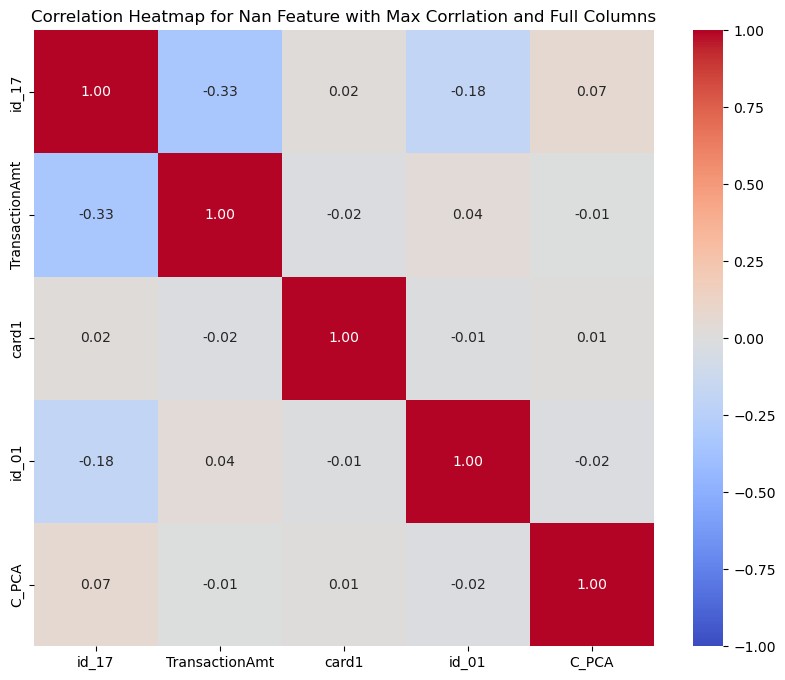

In [ ]:
corr_matrix = df_drop[["id_17"] + numerical_col_FULL[3:]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Nan Feature with Max Corrlation and Full Columns')
plt.show()

##### Filling Numerical features

In [ ]:
def fill_na_knn_regressor(df, feature_with_nan, non_nan_features,num):
    missing_mask = df[feature_with_nan].isna()
    X_train = df.loc[~missing_mask, non_nan_features]
    y_train = df.loc[~missing_mask, feature_with_nan]
    X_test = df.loc[missing_mask, non_nan_features]
    knn = KNeighborsRegressor(n_neighbors=num)
    knn.fit(X_train, y_train)
    df.loc[missing_mask, feature_with_nan] = knn.predict(X_test)
    return df

In [ ]:
for feature in numerical_col_NAN:
    if df_inner[feature].isna().sum() > 0:
        df_NAFill_Num = fill_na_knn_regressor(df_NAFill_Cat, feature, numerical_col_FULL[3:], num=5)

In [ ]:
df_NAFill = df_NAFill_Num.copy()

In [ ]:
df_NAFill.to_csv('Dataset_after_filling_NA.csv')

In [ ]:
df_NAFill = pd.read_csv('Dataset_after_filling_NA.csv').iloc[:, 1:]

## Outerlier detection
According to our project goal is detecting the fraud transactions which is a type of outlier detection. We choose to do the outlier detection based on single variable. We have used two ways to do the outliers detection.

### IQR Detects Outliers
Initially, we applied the IQR method for outlier detection. The results indicated that most numerical features contained  **15%~20%** outliers, suggesting that the IQR method was not effective for our dataset. A possible reason for this is that some features in the dataset exhibit **heavy-tailed** distributions, which can cause the IQR method to classify a large portion of the data as outliers.


In [ ]:
def find_outlier_indices(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
    return outlier_indices

In [ ]:
def draw_outlier_boxplot(df, feature):
    fig, ax = plt.subplots(figsize=(6, 20))
    ax.boxplot(x=df[feature])
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Value')
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
    outliers = df.loc[outlier_indices, feature]
    ax.legend()
    plt.show()

In [ ]:
outliers_map = {}
for col in numerical_col_NAN:
    outliers = find_outlier_indices(df_NAFill, col)
    outliers_map[col] = outliers
for k,v in outliers_map.items():
    if v.shape[0] > 0:
        print(f'Percentages of outliers in {k} using IQR Detection: {round((len(v)/df_NAFill.shape[0])*100,2)}')

Percentages of outliers in D1 using IQR Detection: 20.6
Percentages of outliers in V167 using IQR Detection: 24.44
Percentages of outliers in V168 using IQR Detection: 9.91
Percentages of outliers in V170 using IQR Detection: 28.54
Percentages of outliers in V171 using IQR Detection: 31.03
Percentages of outliers in V202 using IQR Detection: 24.14
Percentages of outliers in V203 using IQR Detection: 17.93
Percentages of outliers in V204 using IQR Detection: 18.8
Percentages of outliers in V217 using IQR Detection: 8.24
Percentages of outliers in V218 using IQR Detection: 12.0
Percentages of outliers in V219 using IQR Detection: 10.0
Percentages of outliers in V221 using IQR Detection: 42.37
Percentages of outliers in V222 using IQR Detection: 44.05
Percentages of outliers in V224 using IQR Detection: 17.28
Percentages of outliers in V228 using IQR Detection: 18.54
Percentages of outliers in V229 using IQR Detection: 24.44
Percentages of outliers in V230 using IQR Detection: 21.21
Perce

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


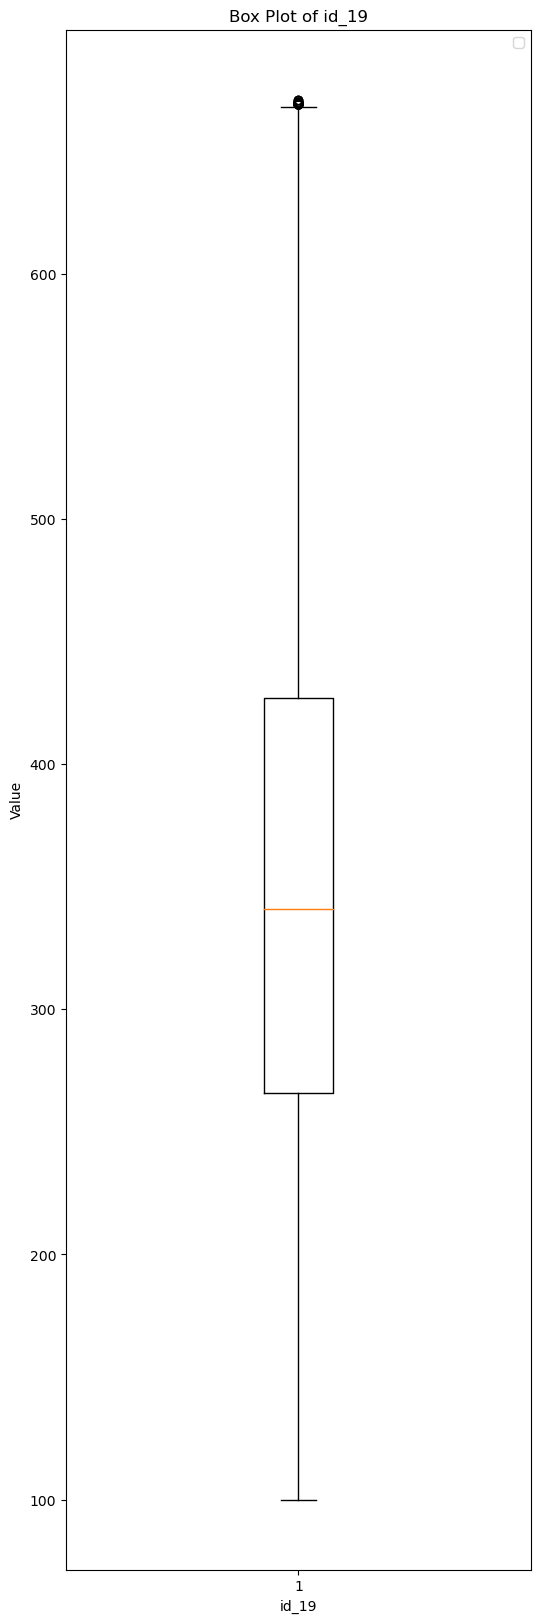

In [ ]:
draw_outlier_boxplot(df_NAFill, 'id_19')

### Z-score outlier detection
We then used the z-score method to identify outliers. The distribution of outliers detected using this method was more favorable than those identified using the IQR method, with most outliers comprising between **0.2% and 4%** of the data. After removing the outliers detected by the z-score, we recalculated the proportion of fraudulent transactions in the revised dataset. Compared to the original dataset, the new dataset exhibited a lower proportion of fraudulent transactions. This outcome is not ideal for our study, as our goal is to predict fraudulent transactions, and a decrease in the fraud rate could result in a less representative sample. The removal of these potential outliers might have inadvertently eliminated valuable information related to fraud, potentially reducing the model's ability to accurately identify fraudulent activities.


In [ ]:
def detect_outliers_zscore(df, feature, threshold=3):
    z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
    outlier_indices = df[z_scores > threshold].index
    return outlier_indices

outliers_zscore_map = {}
for col in numerical_col_NAN:
    outliers_zscore = detect_outliers_zscore(df_NAFill, col)
    outliers_zscore_map[col] = outliers_zscore

for k,v in outliers_zscore_map.items():
    if v.shape[0] > 0:
        print(f'Percentages of outliers in {k} using Z-score: {len(v)/144233}')

Percentages of outliers in card3 using Z-score: 0.005726844758134408
Percentages of outliers in D1 using Z-score: 0.04226494630216386
Percentages of outliers in V167 using Z-score: 0.006752962220850985
Percentages of outliers in V168 using Z-score: 0.008902262311676247
Percentages of outliers in V170 using Z-score: 0.015669090984726103
Percentages of outliers in V171 using Z-score: 0.022630049988560177
Percentages of outliers in V202 using Z-score: 0.006822294481845347
Percentages of outliers in V203 using Z-score: 0.01189741598663274
Percentages of outliers in V204 using Z-score: 0.010524637218944347
Percentages of outliers in V217 using Z-score: 0.006108172193603405
Percentages of outliers in V218 using Z-score: 0.006995625134331255
Percentages of outliers in V219 using Z-score: 0.00628843607218875
Percentages of outliers in V221 using Z-score: 0.00753641677008729
Percentages of outliers in V222 using Z-score: 0.007779079683567561
Percentages of outliers in V224 using Z-score: 0.0130

In [ ]:
outliers_index_list = []
for col in numerical_col_NAN:
    outliers_zscore = detect_outliers_zscore(df_NAFill, col)
    outliers_zscore_map[col] = outliers_zscore
    outliers_index_list.extend(outliers_zscore)
unique_outlier_index = set(outliers_index_list)

In [ ]:
print('After dropping the outliers')
df_NAFill.drop(list(unique_outlier_index))['isFraud'].value_counts(
    dropna=False, normalize = True)

After dropping the outliers


0    0.934691
1    0.065309
Name: isFraud, dtype: float64

In [ ]:
print('Before dropping the outliers detected by z-score')
df_NAFill['isFraud'].value_counts(dropna=False, normalize = True)

Before dropping the outliers detected by z-score


0    0.92153
1    0.07847
Name: isFraud, dtype: float64

## Encoding Categorical Data

### Target Encoding

In [ ]:
def target_encoding(df, target_column):
    df_encoded = df.copy()
    for col in df.columns[df.dtypes == 'object']:
        if col != target_column:
            mapping = df.groupby(col)[target_column].mean()
            df_encoded[col] = df_encoded[col].map(mapping)
    return df_encoded

df_target = target_encoding(df_NAFill, 'isFraud')

### Onehot Encoding

In [ ]:
df_onehot = pd.get_dummies(df_NAFill, columns=df_NAFill.columns[df_NAFill.dtypes == 'object'], dummy_na=False)

# Model Training

In [ ]:
def X_y_train_test(df):
    X = df.sort_values('TransactionDT').drop((['isFraud', 'TransactionDT', 'TransactionID']), axis=1)
    y = list(df.sort_values('TransactionDT')['isFraud'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_test = scaler.fit_transform(X_test)
    return (X_scaled_train, X_scaled_test, y_train, y_test)

### Target Encoding Training Data

In [ ]:
X_train, X_test, y_train, y_test = X_y_train_test(df_target)

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

#### Isolation Forest

In [ ]:
IF = IsolationForest(n_estimators=200, contamination=0.08, n_jobs=-1, random_state=42).fit(X_train)
df_IF = pd.DataFrame(IF.decision_function(X_test), columns = ['Anomaly score'])
df_IF['predict'] = IF.predict(X_test)
df_IF['isFraud'] = y_test

true_positive_count = ((df_IF['isFraud'] == 1) & (df_IF['predict'] == 1)).sum()
print(f"TPR: {true_positive_count/len(df_IF[df_IF['isFraud'] == 1])}")

TPR: 0.6825817860300619


#### Isolation Forest (After PCA)

In [ ]:
IF = IsolationForest(n_estimators=200, contamination=0.08, n_jobs=-1, random_state=42).fit(X_pca_train)
df_IF = pd.DataFrame(IF.decision_function(X_pca_test), columns = ['Anomaly score'])
df_IF['predict'] = IF.predict(X_pca_test)
df_IF['isFraud'] = y_test

true_positive_count = ((df_IF['isFraud'] == 1) & (df_IF['predict'] == 1)).sum()
print(f"TPR: {true_positive_count/len(df_IF[df_IF['isFraud'] == 1])}")

TPR: 0.6914235190097259


### One-hot Encoding Training Data

In [ ]:
X_train, X_test, y_train, y_test = X_y_train_test(df_onehot)

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

#### Isolation Forest

In [ ]:
IF = IsolationForest(n_estimators=200, contamination=0.08, n_jobs=-1, random_state=42).fit(X_train)
df_IF = pd.DataFrame(IF.decision_function(X_test), columns = ['Anomaly score'])
df_IF['predict'] = IF.predict(X_test)
df_IF['isFraud'] = y_test

true_positive_count = ((df_IF['isFraud'] == 1) & (df_IF['predict'] == 1)).sum()
print(f"TPR: {true_positive_count/len(df_IF[df_IF['isFraud'] == 1])}")

TPR: 0.6900972590627763


#### Isolation Forest (After PCA)

In [ ]:
IF = IsolationForest(n_estimators=200, contamination=0.08, n_jobs=-1, random_state=42).fit(X_pca_train)
df_IF = pd.DataFrame(IF.decision_function(X_pca_test), columns = ['Anomaly score'])
df_IF['predict'] = IF.predict(X_pca_test)
df_IF['isFraud'] = y_test

true_positive_count = ((df_IF['isFraud'] == 1) & (df_IF['predict'] == 1)).sum()
print(f"TPR: {true_positive_count/len(df_IF[df_IF['isFraud'] == 1])}")

TPR: 0.7754199823165341


# Next Steps

## Plan for Improvement

###Hyperparameter tuning:
Our second report focuses on data preprocessing before training the models. Therefore, we currently do not have enough time to optimize our models' performances. In machine learning training procedures, hyperparameter tuning plays a significant role in optimizing performance, though it is time-consuming. In the future, we plan to use both GridSearch and RandomSearch for hyperparameter tuning, depending on the training time and the complexity of the hyperparameter space for each model.

###Model evaluation:
Although our machine learning methods are mostly unsupervised machine learning algorithms for detecting outliers in the original dataset, we do have the target column in the training dataset that indicates whether a transaction is fraudulent. As a result, model evaluation will closely resemble evaluating a binary classification problem, whether a transaction is fraud or not. However, due to the significant imbalance between the two categories (with nearly 92% of transactions being normal and only 8% being fraudulent), we need to explore evaluation metrics beyond just accuracy, which is the most common metric for binary classification.
For this project, we will first prioritize the True Positive Rate (TPR) for each model, as we believe it is extremely costly to miss a fraud case (false negative) in real-world applications. Instead of using the default threshold of 0.5 to decide whether a data point is an outlier, we may consider lowering the threshold to predict more cases as outliers and reduce false negatives. This, however, will result in more potential fraud alerts, increasing the workload for verifying those transactions. Therefore, it is crucial to balance reducing false negatives with managing the increased number of fraud alerts. In order to solve this challenge, we plan to explore additional evaluation metrics such as the F1-score and the AUC-ROC Curve, alongside TPR.

###Hybrid Model Training:
Our planned models are suitable for different scenarios. For instance, while Isolation Forest works more efficiently with large datasets and limited features, One-SVM performs better with high-dimensional data that follows a normalized distribution. Therefore, we may consider combining different models with reasonable weights to leverage the strengths of each model for training the data.


## Timeline of Next Steps

**10/28 - 11/4**: Select and construct model evaluation metrics, and further improve data preprocessing if necessary

**11/4 - 11/25**: Complete training for all models with hyperparameter tuning and visualize the results in appropriate formats.

**11/25 - 12/12**: Final check for the entire project. If time permits, construct hybrid model training.